### Bereinigung und Normalisierung aller Reviews

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
data = pd.read_csv("Restaurant_Reviews.tsv", sep='\t', quoting=3)

In [7]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

# Initialisierung des PorterStemmer
ps = PorterStemmer()

reviews = []
# Schleife zur Bereinigung und Normalisierung aller Reviews
for i in range(len(data)): 
    # Entfernung aller nicht alphabetischen Zeichen
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower() 
    review = review.split() # Tokenisierung des Textes
    # Stemming und Entfernung von Stopwords
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = " ".join(review)
    reviews.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\habou\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
reviews[0:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

### Verteilung der Bewertungen und Analyse der häufigsten Wörter

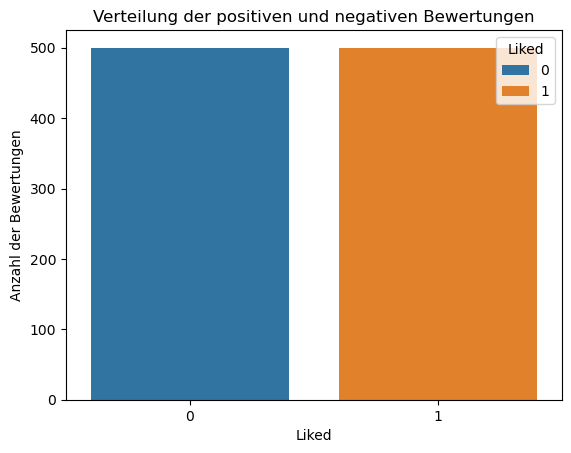

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Liked', data=data, hue="Liked")
plt.title("Verteilung der positiven und negativen Bewertungen")
plt.xlabel("Liked")
plt.ylabel("Anzahl der Bewertungen")
plt.show()

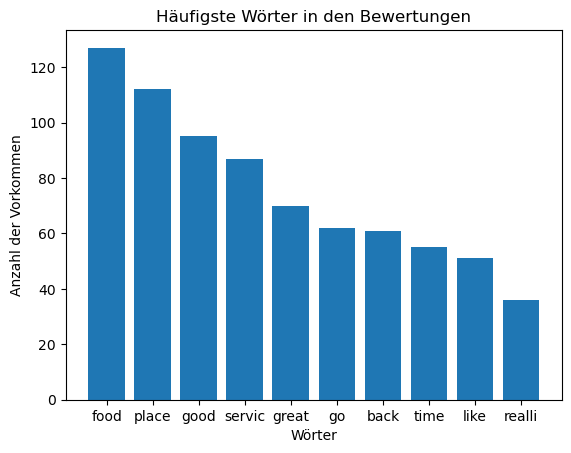

In [8]:
from collections import Counter

# Häufigkeitsanalyse der normalisierten Wörter
all_words = ' '.join(reviews).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)

# Visualisierung der häufigsten Wörter
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.title("Häufigste Wörter in den Bewertungen")
plt.xlabel("Wörter")
plt.ylabel("Anzahl der Vorkommen")
plt.show()

### 4.	Sentiment Analyse von Restaurantbewertungen

#### 4.1.	Machine Learning Ansätze (Naive Bayes)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Bag-of-Words Modell
vectorizer = CountVectorizer(max_features=1500)
X = vectorizer.fit_transform(reviews).toarray()
y = data['Liked'].values

# Daten in Trainings- und Testset aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Modell trainieren
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Vorhersagen auf dem Testset
y_pred = nb_model.predict(X_test)

# Ergebnisse
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.745
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74        96
           1       0.76      0.74      0.75       104

    accuracy                           0.74       200
   macro avg       0.74      0.75      0.74       200
weighted avg       0.75      0.74      0.75       200



### 4.2.	  Implementierung eines LSTM-Modells

In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#from keras.preprocessing.text import Tokenizer

# Tokenisierung und Sequenz-Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(reviews)
X = tokenizer.texts_to_sequences(reviews)
X = pad_sequences(X, maxlen=50)

# Zielvariable (Labels)
y = data['Liked'].values

# Aufteilung der Daten in Trainings- und Testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM Modell erstellen
lstm_model = Sequential()
#Einbettungsschicht
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=50))
# Dropout Schicht
lstm_model.add(SpatialDropout1D(0.2))
# LSTM Schicht
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# Dichte Schicht
lstm_model.add(Dense(1, activation='sigmoid'))
# Kompilierung des Modells
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Trainieren des LSTM Modells
lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Vorhersagen auf dem Testset
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")

# Ergebnisse auswerten
print("LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))
print("Classification Report:\n", classification_report(y_test, y_pred_lstm))


Epoch 1/5


C:\Users\habou\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.4805 - loss: 0.6933 - val_accuracy: 0.6900 - val_loss: 0.6877
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7450 - loss: 0.6772 - val_accuracy: 0.7150 - val_loss: 0.6722
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8015 - loss: 0.6278 - val_accuracy: 0.6150 - val_loss: 0.6391
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8187 - loss: 0.5071 - val_accuracy: 0.7150 - val_loss: 0.5556
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9156 - loss: 0.3288 - val_accuracy: 0.7500 - val_loss: 0.5249
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
LSTM Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75        96
           1       0.78      0.73      0.75       104

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75   

### 4.3.	Implementierung Transformer-Modells (BERT)

In [3]:
data_bert = pd.read_csv("Restaurant_Reviews.tsv", sep='\t', quoting=3)

wenn es diese Fehler (ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x000002370F81B8E0>) kommt, bitte diese Command line ausführen (pip install --upgrade tensorflow transformers)

In [4]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

reviews_bert = data_bert['Review'].tolist()

#BERT-Tokenizer laden
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Tokenisierung der Texte
X_encoded = tokenizer(reviews_bert, padding=True, truncation=True, max_length=128, return_tensors='tf')

# Zielvariable
y = data_bert['Liked'].values

# Umwandlung der Tensoren in numpy bArrays
X_input_ids = X_encoded['input_ids'].numpy()
X_attention_masks = X_encoded['attention_mask'].numpy()

# Aufteilung der Daten
X_train_input_ids, X_test_input_ids, X_train_attention_masks, X_test_attention_masks, y_train, y_test = train_test_split(
    X_input_ids, X_attention_masks, y, test_size=0.2, random_state=42)

# BERT Modell für die Klassifikation laden
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Kompilierung des Modells
bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                   metrics=['accuracy'])

# Training des Modells
bert_model.fit([X_train_input_ids, X_train_attention_masks], y_train, 
               epochs=3, batch_size=16, validation_data=([X_test_input_ids, X_test_attention_masks], y_test))

c:\Users\habou\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


c:\Users\habou\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3


50/50 [==============================] - 129s 2s/step - loss: 0.5201 - accuracy: 0.7788 - val_loss: 0.3179 - val_accuracy: 0.9050
Epoch 2/3
50/50 [==============================] - 129s 3s/step - loss: 0.1751 - accuracy: 0.9500 - val_loss: 0.2296 - val_accuracy: 0.9100
Epoch 3/3
50/50 [==============================] - 122s 2s/step - loss: 0.0849 - accuracy: 0.9712 - val_loss: 0.1366 - val_accuracy: 0.9400


#### wenn diese Fehler (ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x000002370F81B8E0>) gibt, bitte diese Command line (pip install --upgrade tensorflow transformers) ausführen.

In [5]:
# Vorhersagen auf dem Testset
y_pred_bert_logits = bert_model.predict([X_test_input_ids, X_test_attention_masks]).logits

# Umwandlung der Logits in binäre Labels
y_pred_labels = tf.argmax(y_pred_bert_logits, axis=1).numpy()

7/7 [==============================] - 9s 986ms/step


In [6]:
from sklearn.metrics import accuracy_score, classification_report

# Berechnung der Accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"BERT Accuracy: {accuracy:.2f}")

# Detaillierter Classification Report
classification_rep = classification_report(y_test, y_pred_labels, target_names=['Negative', 'Positive'])
print("Classification Report:\n", classification_rep)

BERT Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

    Negative       0.97      0.91      0.94        96
    Positive       0.92      0.97      0.94       104

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



## 5.	Named Entity Recognition (NER) auf Restaurantbewertungen

### 5.1.1.	Vorbereitung der Trainingsdaten

In [1]:
#  Trainingsdaten
TRAIN_DATA = [
    ("Wow... Loved this place.", {"entities": []}),
    ("Crust is not good.", {"entities": []}),
    ("Not tasty and the texture was just nasty.", {"entities": []}),
    ("Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.", {"entities": []}),
    ("The selection on the menu was great and so were the prices.", {"entities": []}),
    ("I ordered a Margherita Pizza at Joe's Pizza in New York.", {"entities": [(12, 29, "DISH"), (33, 44, "RESTAURANT"), (48, 56, "LOCATION")]}),
    ("The pasta at Luigi's was delicious.", {"entities": [(4, 9, "DISH"), (13, 20, "RESTAURANT")]}),
    ("The food at Spago in Los Angeles is simply the best!", {"entities": [(12, 17, "RESTAURANT"), (21, 32, "LOCATION")]}),
    ("Enjoyed a wonderful sushi dinner at Sushi Place.", {"entities": [(30, 40, "RESTAURANT"), (18, 23, "DISH")]}),
    ("The pizza at Mario's in Rome was disappointing.", {"entities": [(9, 16, "DISH"), (20, 26, "RESTAURANT"), (30, 34, "LOCATION")]}),
    ("We had a great time at The Ivy in London.", {"entities": [(23, 30, "RESTAURANT"), (34, 40, "LOCATION")]}),
    ("The steak at Outback Steakhouse is always good.", {"entities": [(4, 9, "DISH"), (13, 30, "RESTAURANT")]}),
    ("Had lunch at Nobu in Malibu. Delicious!", {"entities": [(13, 17, "RESTAURANT"), (21, 27, "LOCATION")]}),
    ("The Caesar salad at Caesar's Palace was great.", {"entities": [(4, 16, "DISH"), (20, 34, "RESTAURANT")]}),
    ("The best ramen in Tokyo can be found at Ichiran.", {"entities": [(9, 14, "DISH"), (18, 23, "LOCATION"), (41, 48, "RESTAURANT")]}),
    ("Tried the pasta at Olive Garden. It was mediocre.", {"entities": [(10, 15, "DISH"), (19, 31, "RESTAURANT")]}),
    ("I had a fantastic brunch at The Diner in Chicago.", {"entities": [(20, 30, "DISH"), (34, 43, "RESTAURANT"), (47, 54, "LOCATION")]}),
    ("Dinner at The French Laundry was a culinary experience.", {"entities": [(7, 22, "RESTAURANT")]}),
    ("Breakfast at Tiffany's is a classic!", {"entities": [(12, 21, "RESTAURANT")]}),
    ("The gelato in Florence is the best in Italy.", {"entities": [(4, 10, "DISH"), (14, 22, "LOCATION")]}),
    ("The curry at Indian Palace is quite good.", {"entities": [(4, 9, "DISH"), (13, 25, "RESTAURANT")]}),
    ("Lunch at Momofuku in NYC was splendid.", {"entities": [(10, 18, "RESTAURANT"), (22, 25, "LOCATION")]}),
    ("The tapas at Barcelona was delicious.", {"entities": [(4, 9, "DISH"), (13, 22, "RESTAURANT")]}),
    ("Sashimi at Nobu in Tokyo is top-notch.", {"entities": [(0, 7, "DISH"), (11, 15, "RESTAURANT"), (19, 24, "LOCATION")]}),
    ("Pho at Pho 24 in Ho Chi Minh City is amazing.", {"entities": [(0, 3, "DISH"), (7, 13, "RESTAURANT"), (17, 32, "LOCATION")]}),
    ("The burger at Shake Shack is overrated.", {"entities": [(4, 10, "DISH"), (14, 25, "RESTAURANT")]}),
    ("Pizza at Pizzeria Bianco in Phoenix was heavenly.", {"entities": [(0, 5, "DISH"), (9, 24, "RESTAURANT"), (28, 35, "LOCATION")]}),
    ("Pad Thai at Thai House in Bangkok is a must-try.", {"entities": [(0, 8, "DISH"), (12, 22, "RESTAURANT"), (26, 33, "LOCATION")]}),
    ("I love the tacos at Taqueria Cancun in SF.", {"entities": [(10, 15, "DISH"), (19, 35, "RESTAURANT"), (39, 41, "LOCATION")]}),
    ("The cheesecake at Junior's in Brooklyn is to die for.", {"entities": [(4, 14, "DISH"), (18, 25, "RESTAURANT"), (29, 37, "LOCATION")]}),
    ("The best sushi in Japan can be found at Sushi Saito.", {"entities": [(9, 14, "DISH"), (18, 23, "LOCATION"), (41, 52, "RESTAURANT")]}),
    ("Dim sum at Tim Ho Wan in Hong Kong is fantastic.", {"entities": [(0, 7, "DISH"), (11, 21, "RESTAURANT"), (25, 34, "LOCATION")]}),
    ("Bagels at Ess-a-Bagel in NYC are a treat.", {"entities": [(0, 6, "DISH"), (10, 22, "RESTAURANT"), (26, 29, "LOCATION")]}),
    ("The dumplings at Din Tai Fung in Shanghai are a delight.", {"entities": [(4, 13, "DISH"), (17, 29, "RESTAURANT"), (33, 41, "LOCATION")]}),
    ("Sushi at Sushi Yasuda in NYC is my favorite.", {"entities": [(0, 5, "DISH"), (9, 21, "RESTAURANT"), (25, 28, "LOCATION")]}),
    ("The burger at In-N-Out in LA is unbeatable.", {"entities": [(4, 10, "DISH"), (14, 23, "RESTAURANT"), (27, 29, "LOCATION")]}),
    ("The lobster roll at Red's Eats in Maine is the best.", {"entities": [(4, 16, "DISH"), (20, 30, "RESTAURANT"), (34, 39, "LOCATION")]}),
    ("The best paella in Spain is at La Barraca.", {"entities": [(9, 15, "DISH"), (19, 24, "LOCATION"), (31, 41, "RESTAURANT")]}),
    ("Chili crab at Jumbo Seafood in Singapore is famous.", {"entities": [(0, 10, "DISH"), (14, 27, "RESTAURANT"), (31, 40, "LOCATION")]}),
    ("The fried chicken at Roscoe's in LA is legendary.", {"entities": [(4, 17, "DISH"), (21, 29, "RESTAURANT"), (33, 35, "LOCATION")]}),
    ("Ramen at Ippudo in NYC is always satisfying.", {"entities": [(0, 5, "DISH"), (9, 15, "RESTAURANT"), (19, 22, "LOCATION")]}),
    ("The pho at Pho Hoa in Vietnam is simply divine.", {"entities": [(4, 7, "DISH"), (11, 19, "RESTAURANT"), (23, 30, "LOCATION")]}),
    ("I adore the gelato at Grom in Florence.", {"entities": [(12, 18, "DISH"), (22, 26, "RESTAURANT"), (30, 38, "LOCATION")]}),
    ("The best burritos in SF are at La Taqueria.", {"entities": [(9, 17, "DISH"), (21, 23, "LOCATION"), (31, 42, "RESTAURANT")]}),
    ("The pancakes at IHOP in Chicago are my guilty pleasure.", {"entities": [(4, 13, "DISH"), (17, 21, "RESTAURANT"), (25, 32, "LOCATION")]}),
    ("Tacos at El Farolito in SF are unmatched.", {"entities": [(0, 5, "DISH"), (9, 21, "RESTAURANT"), (25, 27, "LOCATION")]}),
]


#### wenn diese Fehler (ImportError: cannot import name 'soft_unicode' from 'markupsafe' ) gibt, bitte diese Command line (pip install markupsafe==2.0.1) ausführen.

### 5.1.2.	Modell Implementierung 

In [2]:
import spacy
from spacy.training.example import Example
from spacy.util import minibatch, compounding
import random

#  spaCy Modells Laden
nlp = spacy.load("en_core_web_sm")

#  NER-Komponente Hinzufügen
if "ner" not in nlp.pipe_names:
    ner = nlp.create_pipe("ner")
    nlp.add_pipe(ner, last=True)
else:
    ner = nlp.get_pipe("ner")

# Hinzufügen der Labels 
ner.add_label("RESTAURANT")
ner.add_label("DISH")
ner.add_label("LOCATION")


# Training des Modells
optimizer = nlp.begin_training()

for itn in range(100):
    random.shuffle(TRAIN_DATA)
    losses = {}
    batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
    for batch in batches:
        texts, annotations = zip(*batch)
        # Konvertiere die Trainingsdaten in das neue Example-Format
        examples = [Example.from_dict(nlp.make_doc(text), annotation) for text, annotation in zip(texts, annotations)]
        # Update mit dem neuen Format
        nlp.update(examples, drop=0.5, losses=losses)
    print(f"Iteration {itn}, Losses {losses}")

# Speichern des trainierten Modells
nlp.to_disk("ner_restaurant_model")

c:\Users\habou\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "The best sushi in Japan can be found at Sushi Sait..." with entities "[(9, 14, 'DISH'), (18, 23, 'LOCATION'), (41, 52, '...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
c:\Users\habou\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "The burger at In-N-Out in LA is unbeatable." with entities "[(4, 10, 'DISH'), (14, 23, 'RESTAURANT'), (27, 29,...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
c:\Users\habou\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be a

Iteration 0, Losses {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 365.09175242390484}
Iteration 1, Losses {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 191.57750236976062}
Iteration 2, Losses {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 124.84704045756234}
Iteration 3, Losses {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 112.73504202740503}
Iteration 4, Losses {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 141.18254098415446}
Iteration 5, Losses {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 138.62114112103745}
Iteration 6, Losses {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 87.03306180674285}
Iteration 7, Losses {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 75.54610629003669}
Iteration 8, Losses {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 72.31564820845514}
Iteration 9, Losses {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 57.424152378129186}
Iteration 10, Losses {'tok2vec': 0.0, 'tagger': 0.0, 'parser': 

In [10]:
# Laden des trainierten NER-Modells
nlp_ner = spacy.load("ner_restaurant_model")

for review in reviews:
    doc = nlp_ner(review)
    if doc.ents:
        print(f"Review: {review}")
        for ent in doc.ents:
            print(f" - Entität: {ent.text}, Label: {ent.label_}")
        print("\n")


c:\Users\habou\anaconda3\lib\site-packages\spacy\pipeline\attributeruler.py:149: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  matches = self.matcher(doc, allow_missing=True, as_spans=False)
c:\Users\habou\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Review: also combo like burger fri beer decent deal
 - Entität: burger, Label: DISH


Review: burger good beef cook right
 - Entität: burger, Label: DISH


Review: definit go back
 - Entität: definit, Label: DISH
 - Entität: back, Label: RESTAURANT


Review: come like experienc underwhelm relationship parti wait person ask break
 - Entität: break, Label: RESTAURANT


Review: poor batter meat ratio made chicken tender unsatisfi
 - Entität: batter, Label: DISH


Review: better atmospher
 - Entität: better, Label: DISH


Review: kind hard mess steak
 - Entität: steak, Label: DISH


Review: guy steak steak love son steak best worst place said best steak ever eaten
 - Entität: steak, Label: DISH
 - Entität: steak, Label: DISH
 - Entität: steak, Label: DISH


Review: phenomen food servic ambianc
 - Entität: phenomen, Label: DISH


Review: good select food includ massiv meatloaf sandwich crispi chicken wrap delish tuna melt tasti burger
 - Entität: burger, Label: DISH


Review: order voodoo p